In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf # Shift + Enter to run

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# Loading - ** MNIST Data Set **
## Containing Traning Samples = 60,000 , Testing Samples = 10,000
### TensorFlow already contain MNIST data set which can be loaded using Keras

In [5]:
mnist = tf.keras.datasets.mnist ## handwritten 0 to 9 characters based on 28x28 sized images

# After loading the MNIST data, Divide into train and test datasets

In [6]:
## unpacking the dataset into train and test dadasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

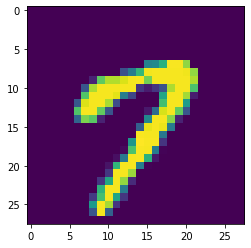

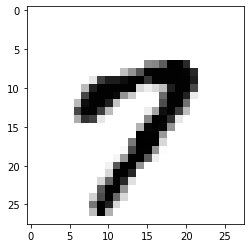

In [7]:
## just check the graph, how data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[15])
plt.show() #executing the graph
## however we dont know whether its color image or binary images
## so inorder to plot it change the configuration
plt.imshow(x_train[15], cmap = plt.cm.binary)

## Checking the value of ecah pixel
## Before Normalization

In [8]:
print (x_train[15]) ### before  normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 121 162
  253 253 213   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 107 170 25

# As images are in Grey level(1 channel ==> 0 to 255), not Colored(RGB)
## Normalizing the data | Pre-Processing Step

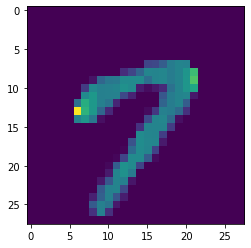

In [9]:
### you might have noticed that its grey image and all values varies from 0 to 255
### in order to normalize it
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize (x_test, axis = 1)
plt.imshow(x_train[15])

# After Normalization

In [10]:
print(x_train[15]) ## you can see all values are now normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
print(y_train[15]) ### just to check that we have labels inside our network

7


# Resizing image to make it suitable for apply Convolution operation

In [12]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ### increasing one dimension for kernal [(a.k.a) filter] operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ### increasing one dimension for kernal [(a.k.a) filter] operation
print ("Training Samples Dimension", x_trainr.shape)
print ("Training Samples Dimension", x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Training Samples Dimension (10000, 28, 28, 1)


# Creating a Deep Neural Network
## Training on 60,000 samples of MIST handwritten dataset

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [14]:
### Creating a Neural network now
model = Sequential()

### 1st Convolution layer 0 1 2 3  (60000,28,28,1)   28*3+1 = 26x26
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) ### only for first convolution layer to mention input layer size
model.add(Activation("relu")) ##activation function- to make it non-linear, any values <0 is dropped and values >0 is allowed
model.add(MaxPooling2D(pool_size = (2,2))) ## MaxPooling single maximum value of 2x2

### 2nd Convolution layer   (26*3+1 = 24x24)
model.add(Conv2D(64, (3,3))) ### 2nd Convolution layer
model.add(Activation("relu")) ##activation function
model.add(MaxPooling2D(pool_size = (2,2))) ## MaxPooling

### 3rd Convolution layer
model.add(Conv2D(64, (3,3))) ### 3rd Convolution layer
model.add(Activation("relu")) ##activation function
model.add(MaxPooling2D(pool_size = (2,2))) ## MaxPooling

### Fully Connected Layer # 1 (20x20 = 400)
model.add(Flatten()) ### before using fully connected layer, need to be flatten so that 2D to 1D
model.add(Dense(64)) # Neural Network
model.add(Activation("relu"))

### Fully Connected Layer # 2
model.add(Dense(32))
model.add(Activation("relu"))

### Final Fully Connected Layer 
## output must be equal to number of classes, 10(0-9)
model.add(Dense(10)) ## this last dense layer must be equal to 10
model.add(Activation("softmax")) ### activation function is changed to softmax (class probabilities)
## binary classification, one neuron is Dense layer, sigmoid

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [16]:
print ("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [17]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [19]:
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3) # Training my model

Epoch 1/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.0584 - val_accuracy: 0.9842
Epoch 2/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0331 - accuracy: 0.9893 - val_loss: 0.0511 - val_accuracy: 0.9848
Epoch 3/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0612 - val_accuracy: 0.9825
Epoch 4/5
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0236 - accuracy: 0.9919 - val_loss: 0.0612 - val_accuracy: 0.9832
Epoch 5/5
1313/1313 [==============================] - 39s 29ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0752 - val_accuracy: 0.9804


In [20]:
### Evaluating on tseting data set MNIT
test_loss, test_acc = model.evaluate(x_testr, y_test)
print ("Test loss in 10,000 tset samples", test_loss)
print ("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0688 - accuracy: 0.9836: 0s -
Test loss in 10,000 tset samples 0.06877875328063965
Validation Accuracy on 10,000 test samples 0.9836000204086304


In [21]:
# predictions = new_model.predict([x_test])  ## there is specialized method for efiiciently solving our model, to name all inputs
### therefore instead of using new model loaded, for now only for predictions i am using simple model
predictions = model.predict([x_testr])

In [22]:
print (np.argmax(predictions[0]))  ### so actually argmax will return the maximum value index and find the value of it

7


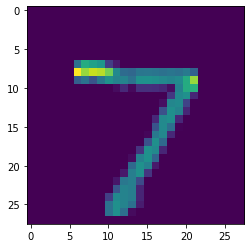

In [23]:
### now to check that is our answer is true or false
plt.imshow(x_test[0])

In [24]:
##in order to understand, convert the predictions from one hot encoding, we need to use numpy for that
print(np.argmax(predictions[128])) ### so actually argmax will return the maximum value index and find the value of it

8


In [25]:
import cv2

In [26]:
img = cv2.imread('seven.png')

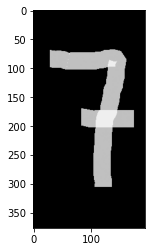

In [27]:
plt.imshow(img)

In [28]:
img.shape

(377, 193, 3)

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [30]:
gray.shape

(377, 193)

In [31]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [32]:
resized.shape

(28, 28)

In [33]:
newimg = tf.keras.utils.normalize (resized , axis = 1)  ## 0 to 1 scaling

In [34]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Kernal operation of convoution layer,

In [35]:
newimg.shape

(1, 28, 28, 1)

In [36]:
predictions = model.predict(newimg)

In [37]:
print (np.argmax(predictions))

7


In [40]:
import numpy as np
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

In [ ]:
cap = cv2.VideoCapture("video.mp4")
#cap.set(cv2.CAP_PROP_FPS, 170)
#check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")
    
text = "some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make the coords ofyhe box with a small padding of two pixels
box_cords = ((text_offset_x, text_offset_y), (text_offset_x + text_width +2, text_offset_y + text_height +2))
#cv2.rectangle(img, box_cords[0], box_cords[1],rectangle_bgr, cv2.FILLED)
#cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontscale = font_scale, color(0,0,0), thickness = 1)
cntr = 0;
while True:
    ret, frame = cap.read()
    cntr = cntr + 1;
    if((cntr%2)==0):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
        newing = tf.keras.utils.normalize (resized, axis = 1)
        newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        predictions = model.predict(newimg)
        status = np.argmax(newimg)
        print(status)
        print(type(status))
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,255,0), -1)
        # Add text
        cv2.putText(frame, status.astype(str), (x1 + int(w1/5), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        
        # gray = cv2.cvtcolor(frame, cv2.COLOR_BGR2GRAY)
        # print(faceCascade.empty())
        # faces = faceCascade.detectMultiScale(gray, 1.1, 4)
        
        # Draw a rectangle around the faces
        # for (x, y, w, h) in faces:
        #        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        
        # use putText() method for
        # inserting text on video
        
        cv2.imshow('Handwritten Digits Recognition Tutorial', frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()